In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indic

In [2]:
df = pd.read_csv('prepd-data-40y.csv')
df.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Region
0,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
1,2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,None,China
2,3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",None,China
3,4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,None,China
4,5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,None,China


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102459 entries, 0 to 102458
Data columns (total 16 columns):
Unnamed: 0    102459 non-null int64
ID            102459 non-null int64
Name          102459 non-null object
Sex           102459 non-null object
Age           102459 non-null float64
Height        102459 non-null float64
Weight        102459 non-null float64
Team          102459 non-null object
NOC           102459 non-null object
Year          102459 non-null int64
Season        102459 non-null object
City          102459 non-null object
Sport         102459 non-null object
Event         102459 non-null object
Medal         102459 non-null object
Region        102459 non-null object
dtypes: float64(3), int64(3), object(10)
memory usage: 12.5+ MB


In [4]:
x = df[['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'City', 'Sport', 'Event']].values
y = df['Medal'].values
print(x[:10])
print(y[:10])

[['M' 23.0 170.0 60.0 'CHN' 2012 'Summer' 'London' 'Judo'
  "Judo Men's Extra-Lightweight"]
 ['M' 22.0 182.0 75.0 'CHN' 2000 'Summer' 'Sydney' 'Boxing'
  "Boxing Men's Middleweight"]
 ['M' 25.0 160.0 62.0 'CHN' 2004 'Summer' 'Athina' 'Wrestling'
  "Wrestling Men's Lightweight, Greco-Roman"]
 ['F' 14.0 168.0 54.0 'CHN' 2016 'Summer' 'Rio de Janeiro' 'Swimming'
  "Swimming Women's 200 metres Freestyle"]
 ['F' 14.0 168.0 54.0 'CHN' 2016 'Summer' 'Rio de Janeiro' 'Swimming'
  "Swimming Women's 4 x 200 metres Freestyle Relay"]
 ['M' 22.0 178.0 72.0 'CHN' 2006 'Winter' 'Torino' 'Speed Skating'
  "Speed Skating Men's 500 metres"]
 ['M' 22.0 178.0 72.0 'CHN' 2006 'Winter' 'Torino' 'Speed Skating'
  "Speed Skating Men's 1,000 metres"]
 ['M' 19.0 173.0 70.0 'CHN' 1998 'Winter' 'Nagano'
  'Short Track Speed Skating'
  "Short Track Speed Skating Men's 500 metres"]
 ['M' 19.0 173.0 70.0 'CHN' 1998 'Winter' 'Nagano'
  'Short Track Speed Skating'
  "Short Track Speed Skating Men's 1,000 metres"]
 ['M

In [5]:
le_indices = [0, 4, 6, 7, 8, 9]
std_indices = [1, 2, 3, 5]

le = []
for i in range(len(le_indices)):
    le.append(LabelEncoder())
    le[i].fit(x[:,le_indices[i]])
    x[:,le_indices[i]] = le[i].transform(x[:,le_indices[i]])

std = StandardScaler()
x_std = std.fit_transform(x)

classes = np.unique(y)

ley = LabelEncoder()   
y = ley.fit_transform(y)

print(x_std[:10])
print(y[:10])

ley_name_mapping = dict(zip(classes, ley.transform(classes)))
print(ley_name_mapping)

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

[[ 0.83898833 -0.4953247  -0.52765302 -0.72796508 -1.01252092  0.89861524
  -0.51364747 -0.34157542  0.22550914  0.19195017]
 [ 0.83898833 -0.67930314  0.57327712  0.26199686 -1.01252092 -0.9144706
  -0.51364747  1.28492807 -0.81955147 -0.87712193]
 [ 0.83898833 -0.12736781 -1.4450948  -0.59597015 -1.01252092 -0.31010866
  -0.51364747 -1.31747751  1.85841635  1.81105211]
 [-1.19191169 -2.15113069 -0.71114137 -1.12394985 -1.01252092  1.50297719
  -0.51364747  0.30902598  1.20525347  1.27651606]
 [-1.19191169 -2.15113069 -0.71114137 -1.12394985 -1.01252092  1.50297719
  -0.51364747  0.30902598  1.20525347  1.30750366]
 [ 0.83898833 -0.67930314  0.20630041  0.06400447 -1.01252092 -0.00792768
   1.94686056  1.61022877  1.13993718  1.02086839]
 [ 0.83898833 -0.67930314  0.20630041  0.06400447 -1.01252092 -0.00792768
   1.94686056  1.61022877  1.13993718  0.98988079]
 [ 0.83898833 -1.23123847 -0.25242048 -0.06799045 -1.01252092 -1.21665158
   1.94686056 -0.01627472  0.81335574  0.80395521]
 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [7]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(5),max_iter=1000,random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[    0     0  1506     0]
 [    0     0  1440     0]
 [    0     0 26336     0]
 [    0     0  1456     0]]

Classification Report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1506
          1       0.00      0.00      0.00      1440
          2       0.86      1.00      0.92     26336
          3       0.00      0.00      0.00      1456

avg / total       0.73      0.86      0.79     30738


Accuracy: 0.857
CPU times: user 4.8 s, sys: 122 ms, total: 4.92 s
Wall time: 4.82 s


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
%%time
data = []
for i in range(1,100):
    mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=i, random_state=0)
    mlp.fit(x_train, y_train)
    y_pred = mlp.predict(x_test)
    error = mean_squared_error(y_test, y_pred)
    data.append([i, error])

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/l

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (37) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (38) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anacond

CPU times: user 9min 19s, sys: 13.1 s, total: 9min 32s
Wall time: 8min 57s


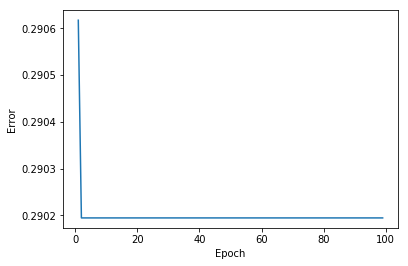

In [9]:
df_error = pd.DataFrame(data, columns = ['Epoch', 'Error'])
sb.lineplot(data=df_error, x='Epoch', y='Error')

In [10]:
df = df.loc[df.Medal!='None']

x = df[['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'City', 'Sport', 'Event']].values
y = df['Medal'].values

le_indices = [0, 4, 6, 7, 8, 9]
std_indices = [1, 2, 3, 5]

le = []
for i in range(len(le_indices)):
    le.append(LabelEncoder())
    le[i].fit(x[:,le_indices[i]])
    x[:,le_indices[i]] = le[i].transform(x[:,le_indices[i]])

std = StandardScaler()
x_std = std.fit_transform(x)

classes = np.unique(y)

ley = LabelEncoder()   
y = ley.fit_transform(y)

ley_name_mapping = dict(zip(classes, ley.transform(classes)))
print(ley_name_mapping)

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

{'Bronze': 0, 'Gold': 1, 'Silver': 2}


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(5),max_iter=1000,random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[643 422 430]
 [500 603 326]
 [543 450 407]]

Classification Report:
             precision    recall  f1-score   support

          0       0.38      0.43      0.40      1495
          1       0.41      0.42      0.42      1429
          2       0.35      0.29      0.32      1400

avg / total       0.38      0.38      0.38      4324


Accuracy: 0.382


In [12]:
%%time
data = []
for i in range(1,1000):
    mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=i, random_state=0)
    mlp.fit(x_train, y_train)
    y_pred = mlp.predict(x_test)
    error = mean_squared_error(y_test, y_pred)
    data.append([i, error])

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/l

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (37) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (38) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anacond

CPU times: user 21min 6s, sys: 1min 32s, total: 22min 38s
Wall time: 17min


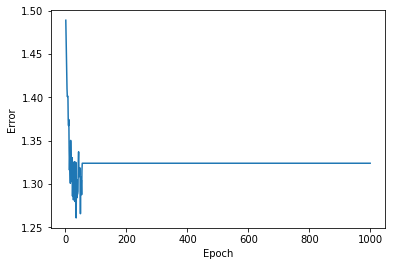

In [13]:
df_error = pd.DataFrame(data, columns = ['Epoch', 'Error'])
sb.lineplot(data=df_error, x='Epoch', y='Error')

In [14]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(100, 50),max_iter=1000,random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[680 495 320]
 [362 826 241]
 [463 466 471]]

Classification Report:
             precision    recall  f1-score   support

          0       0.45      0.45      0.45      1495
          1       0.46      0.58      0.51      1429
          2       0.46      0.34      0.39      1400

avg / total       0.46      0.46      0.45      4324


Accuracy: 0.457
CPU times: user 23.5 s, sys: 11.4 s, total: 34.9 s
Wall time: 11.8 s


In [15]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(1000, 100, 50),max_iter=1000,random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[721 310 464]
 [280 768 381]
 [313 275 812]]

Classification Report:
             precision    recall  f1-score   support

          0       0.55      0.48      0.51      1495
          1       0.57      0.54      0.55      1429
          2       0.49      0.58      0.53      1400

avg / total       0.54      0.53      0.53      4324


Accuracy: 0.532
CPU times: user 2min 30s, sys: 44.6 s, total: 3min 14s
Wall time: 1min 1s


In [16]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter=1000, random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[725 418 352]
 [562 639 228]
 [652 402 346]]

Classification Report:
             precision    recall  f1-score   support

          0       0.37      0.48      0.42      1495
          1       0.44      0.45      0.44      1429
          2       0.37      0.25      0.30      1400

avg / total       0.39      0.40      0.39      4324


Accuracy: 0.395
CPU times: user 3.99 s, sys: 174 ms, total: 4.17 s
Wall time: 3.97 s


In [17]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(100, 80, 60, 40, 20),max_iter=1000,random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[882 279 334]
 [443 694 292]
 [514 286 600]]

Classification Report:
             precision    recall  f1-score   support

          0       0.48      0.59      0.53      1495
          1       0.55      0.49      0.52      1429
          2       0.49      0.43      0.46      1400

avg / total       0.51      0.50      0.50      4324


Accuracy: 0.503
CPU times: user 1min 7s, sys: 13.2 s, total: 1min 20s
Wall time: 21.1 s


In [18]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(1000, 500, 200, 100, 50),max_iter=1000,random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[801 340 354]
 [341 810 278]
 [391 331 678]]

Classification Report:
             precision    recall  f1-score   support

          0       0.52      0.54      0.53      1495
          1       0.55      0.57      0.56      1429
          2       0.52      0.48      0.50      1400

avg / total       0.53      0.53      0.53      4324


Accuracy: 0.529
CPU times: user 8min 11s, sys: 1min 19s, total: 9min 31s
Wall time: 2min 26s


In [21]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(1000, 1000, 1000, 1000, 1000, 1000, 800, 500, 200, 100), max_iter=1000,random_state=0)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy: %.3f' % accuracy_score(y_test, y_pred))

Confusion Matrix:
[[   0 1495    0]
 [   0 1429    0]
 [   2 1398    0]]

Classification Report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1495
          1       0.33      1.00      0.50      1429
          2       0.00      0.00      0.00      1400

avg / total       0.11      0.33      0.16      4324


Accuracy: 0.330
CPU times: user 8min 59s, sys: 1min 59s, total: 10min 58s
Wall time: 3min 29s


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
